In [ ]:
#| default_exp pandas

<a id=top></a>

# Pandas

> Testing specific features from Pandas lib 

In [ ]:
#| export
import pandas as pd, numpy as np

## Creating from numpy

In [ ]:
n = 3
df = pd.DataFrame(data=np.arange(0,n**2,1,dtype=np.int16).reshape((n,n)))#, columns=["a","b","c"])
df

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8


[back to top](#top)

## Indexing on operations

In [ ]:
n = 3
df2 = pd.DataFrame(data=np.arange(0,n**2,1,dtype=np.int16).reshape((n,n)), columns=[1,3,0], index=[2,0,1])
df2

,1,3,0
2,0,1,2
0,3,4,5
1,6,7,8


Pandas method ```reindex``` selects existing indexes/columns and fills non-existing ones

In [ ]:
df2 = df2.reindex(columns=[0,1,2,3], index=[0,1,2,3], fill_value=0)
df2

,0,1,2,3
0,5,3,0,4
1,8,6,0,7
2,2,0,0,1
3,0,0,0,0


Operations without elements on both df are filled with ```NaN```

In [ ]:
df + df2

,0,1,2,3
0,5.0,4.0,2.0,NaN
1,11.0,10.0,5.0,NaN
2,8.0,7.0,8.0,NaN
3,NaN,NaN,NaN,NaN


By using pandas method ```add``` we can choose how to fill in these situations.

Other operators:
   
- ```radd```
- ```sub, rsub```
- ```div, rdiv```
- ```floordiv, rfloordiv```
- ```mul, rmul```
- ```pow, rpow```

In [ ]:
df.add(df2, fill_value=1)

,0,1,2,3
0,5.0,4.0,2.0,5.0
1,11.0,10.0,5.0,8.0
2,8.0,7.0,8.0,2.0
3,1.0,1.0,1.0,1.0


Broadcasting in ```DataFrames``` requires the additional information of matching axis, if not by rows.

In [ ]:
df

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8


In [ ]:
df.divide(df[1], axis='index')

,0,1,2
0,0.000000,1.0,2.000000
1,0.750000,1.0,1.250000
2,0.857143,1.0,1.142857


The opposite is true for ```apply```, where you would select columns to have the summation happen through the columns

In [ ]:
df.apply(sum, axis="columns")

0     3
1    12
2    21
dtype: int64

And can also return series. Probably how ```describe``` and ```info``` work

In [ ]:
df.apply(lambda x: pd.Series([x.min(), x.max()], index=["min", "max"]))

,0,1,2
min,0,1,2
max,6,7,8


Element wise "apply" for ```DataFrames``` is called ```applymap```. Equivalent to ```map``` in ```Series```

In [ ]:
df.cov()

,0,1,2
0,9.0,9.0,9.0
1,9.0,9.0,9.0
2,9.0,9.0,9.0


[back to top](#top)

## Categorical type

Creating from cut

In [ ]:
nums = np.random.randint(0,9,20, dtype = np.int8)
bins = range(0,10,2)

cat_var = pd.cut(nums, bins)
cat_var

[(2, 4], (2, 4], (4, 6], (2, 4], (6, 8], ..., (6, 8], (2, 4], (0, 2], (6, 8], (6, 8]]
Length: 20
Categories (4, interval[int64, right]): [(0, 2] < (2, 4] < (4, 6] < (6, 8]]

In [ ]:
cat_var.categories

IntervalIndex([(0, 2], (2, 4], (4, 6], (6, 8]], dtype='interval[int64, right]')

In [ ]:
cat_var.codes

array([1, 1, 2, 1, 3, 0, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0, 3, 3],
      dtype=int8)

In [ ]:
cat_var == cat_var.categories[cat_var.codes]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

[back to top](#top)

### Histogram

<AxesSubplot:>

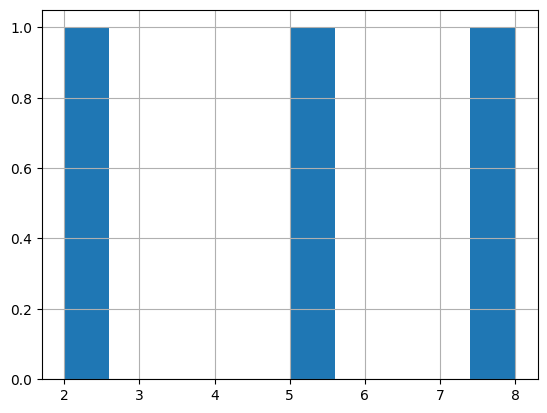

In [ ]:
df.loc[:,2].hist()

[back to top](#top)